In [1]:
import pandas as pd

In [3]:
edges = pd.read_csv('/mnt/data/cora/edges.csv')
nodes = pd.read_csv('/mnt/data/cora/nodes.csv')

In [4]:
print(edges.head())

   Unnamed: 0  sourceNodeId  targetNodeId relationshipType
0           0            35          1033            CITES
1           1            35        103482            CITES
2           2            35        103515            CITES
3           3            35       1050679            CITES
4           4            35       1103960            CITES


In [5]:
print(nodes.head())

   Unnamed: 0   nodeId labels                 subject  \
0           0    31336  Paper         Neural_Networks   
1           1  1061127  Paper           Rule_Learning   
2           2  1106406  Paper  Reinforcement_Learning   
3           3    13195  Paper  Reinforcement_Learning   
4           4    37879  Paper   Probabilistic_Methods   

                                            features  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


In [7]:
# get features and convert it to a list of idexes
fi = []
features = nodes['features'].values
for f in features:
    i = []
    for k, j in enumerate(f):
        if j == '1':
            i.append(k)
    fi.append(i)
    
print(fi[:5])

[[355, 376, 529, 757, 1054, 1369, 1522, 1564, 1858, 1945, 2095, 2107, 2203, 2536, 2707, 3616, 3628, 3709, 4057, 4279], [37, 1528, 1861, 2290, 2647, 2680, 2935, 3394, 3406, 3532, 3622, 3769, 3790, 3799, 3997, 4168, 4276], [136, 628, 637, 718, 877, 1183, 1531, 1543, 1744, 1864, 1870, 1915, 3226, 3397, 3532, 3619, 3790, 3868, 4048, 4168, 4246, 4264], [124, 280, 298, 448, 1783, 1852, 1873, 1945, 2623, 2746, 2827, 2965, 3013, 3148, 3214, 3511, 3532, 3583, 3877, 4045, 4048], [133, 367, 406, 460, 1093, 1189, 1207, 1423, 1522, 1858, 1984, 2098, 2104, 2485, 3199, 3523, 3526, 3532, 3625, 3628, 3637, 3763, 4144]]


In [10]:
max = 0
min = 100000
sum = 0
uniq_features = set()
for f in fi:
    uniq_features.update(f)
    if len(f) > max:
        max = len(f)
    if len(f) < min:
        min = len(f)
    sum += len(f)
print(max)
print(min)
print(sum/len(f))
print(len(uniq_features))

30
1
2590.315789473684
1432


(array([  1.,   0.,   0.,  23.,   0.,   0.,  32.,   0.,   0.,   0.,  56.,
          0.,   0.,  78.,   0.,   0.,   0.,  68.,   0.,   0.,  39.,   0.,
          0.,   0.,  31.,   0.,   0.,  24.,   0.,   0.,   0.,  18.,   0.,
          0.,  15.,   0.,   0.,  12.,   0.,   0.,   0.,  28.,   0.,   0.,
         35.,   0.,   0.,   0.,  68.,   0.,   0., 102.,   0.,   0.,   0.,
        167.,   0.,   0., 200.,   0.,   0.,   0., 278.,   0.,   0., 319.,
          0.,   0., 320.,   0.,   0.,   0., 261.,   0.,   0., 237.,   0.,
          0.,   0., 157.,   0.,   0.,  93.,   0.,   0.,   0.,  35.,   0.,
          0.,   8.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.  ,  1.29,  1.58,  1.87,  2.16,  2.45,  2.74,  3.03,  3.32,
         3.61,  3.9 ,  4.19,  4.48,  4.77,  5.06,  5.35,  5.64,  5.93,
         6.22,  6.51,  6.8 ,  7.09,  7.38,  7.67,  7.96,  8.25,  8.54,
         8.83,  9.12,  9.41,  9.7 ,  9.99, 10.28, 10.57, 10.86, 11.15,
        11.44, 11.73, 12.02, 12.31

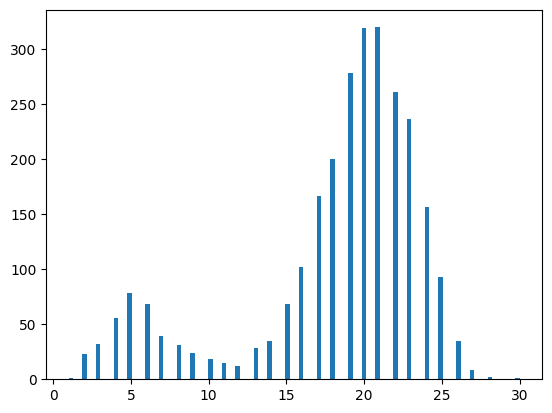

In [11]:
# histogram of number of features
import matplotlib.pyplot as plt
import numpy as np
plt.hist([len(f) for f in fi], bins=100)

In [13]:
# padd missing features with -1 and make all features the same length
max_len = 0
for f in fi:
    if len(f) > max_len:
        max_len = len(f)
features = []
for f in fi:
    features.append(f + [-1]*(max_len-len(f)))


                                                0     \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                1     \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   

                                                2     \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                3     \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                4     \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                5     \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                6     \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                7     \
0  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                8     \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 